In [4]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

'''Reference:
    https://www.pluralsight.com/guides/introduction-to-densenet-with-tensorflow
'''

'Reference:\n    https://www.pluralsight.com/guides/introduction-to-densenet-with-tensorflow\n'

In [5]:
print("Tensorflow-version:", tensorflow.__version__)

Tensorflow-version: 2.9.1


In [6]:
model_d=DenseNet169(weights='imagenet',include_top=False, input_shape=(128, 128, 3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(22,activation='softmax')(x) #FC-layer, your number of the classes

In [7]:
model=Model(inputs=model_d.input,outputs=preds)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1/conv[0][0]']         

                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_2_conv (Conv2D)   (None, 32, 32, 32)   36864       ['conv2_block4_1_relu[0][0]']    
                                                                                                  
 conv2_block4_concat (Concatena  (None, 32, 32, 192)  0          ['conv2_block3_concat[0][0]',    
 te)      

 conv3_block2_1_conv (Conv2D)   (None, 16, 16, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 16, 16, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 16, 16, 32)   36864       ['conv3_block2_1_relu[0][0]']    
                                                                                                  
 conv3_blo

                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 16, 16, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 16, 16, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 16, 16, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block7_0_relu (Activatio  (None, 16, 16, 320)  0          ['conv3_block7_0_bn[0][0]']      
 n)       

 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 16, 16, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 16, 16, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_block11_1_bn (BatchNorma  (None, 16, 16, 128)  512        ['conv3_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_blo

 conv4_block3_0_bn (BatchNormal  (None, 8, 8, 320)   1280        ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 8, 8, 320)   0           ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 8, 8, 128)    40960       ['conv4_block3_0_relu[0][0]']    
                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv4_block3_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 8, 8, 128)   0           ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 8, 8, 32)     36864       ['conv4_block7_1_relu[0][0]']    
                                                                                                  
 conv4_block7_concat (Concatena  (None, 8, 8, 480)   0           ['conv4_block6_concat[0][0]',    
 te)      

 conv4_block11_2_conv (Conv2D)  (None, 8, 8, 32)     36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 8, 8, 608)   0           ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 8, 8, 608)   2432        ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block12_0_relu (Activati  (None, 8, 8, 608)   0           ['conv4_block12_0_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block16_0_relu (Activati  (None, 8, 8, 736)   0           ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 8, 8, 128)    94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 8, 8, 128)   512         ['conv4_block16_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_1_relu (Activati  (None, 8, 8, 128)   0           ['conv4_block16_1_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 8, 8, 128)   0           ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 8, 8, 32)     36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_block20_concat (Concaten  (None, 8, 8, 896)   0           ['conv4_block19_concat[0][0]',   
 ate)                                                             'conv4_block20_2_conv[0][0]']   
                                                                                                  
 conv4_blo

 conv4_block24_concat (Concaten  (None, 8, 8, 1024)  0           ['conv4_block23_concat[0][0]',   
 ate)                                                             'conv4_block24_2_conv[0][0]']   
                                                                                                  
 conv4_block25_0_bn (BatchNorma  (None, 8, 8, 1024)  4096        ['conv4_block24_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block25_0_relu (Activati  (None, 8, 8, 1024)  0           ['conv4_block25_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block25_1_conv (Conv2D)  (None, 8, 8, 128)    131072      ['conv4_block25_0_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv4_block29_1_conv (Conv2D)  (None, 8, 8, 128)    147456      ['conv4_block29_0_relu[0][0]']   
                                                                                                  
 conv4_block29_1_bn (BatchNorma  (None, 8, 8, 128)   512         ['conv4_block29_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block29_1_relu (Activati  (None, 8, 8, 128)   0           ['conv4_block29_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv5_block1_0_relu (Activatio  (None, 4, 4, 640)   0           ['conv5_block1_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block1_1_conv (Conv2D)   (None, 4, 4, 128)    81920       ['conv5_block1_0_relu[0][0]']    
                                                                                                  
 conv5_block1_1_bn (BatchNormal  (None, 4, 4, 128)   512         ['conv5_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block1_1_relu (Activatio  (None, 4, 4, 128)   0           ['conv5_block1_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv5_block5_1_relu (Activatio  (None, 4, 4, 128)   0           ['conv5_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block5_2_conv (Conv2D)   (None, 4, 4, 32)     36864       ['conv5_block5_1_relu[0][0]']    
                                                                                                  
 conv5_block5_concat (Concatena  (None, 4, 4, 800)   0           ['conv5_block4_concat[0][0]',    
 te)                                                              'conv5_block5_2_conv[0][0]']    
                                                                                                  
 conv5_block6_0_bn (BatchNormal  (None, 4, 4, 800)   3200        ['conv5_block5_concat[0][0]']    
 ization) 

 te)                                                              'conv5_block9_2_conv[0][0]']    
                                                                                                  
 conv5_block10_0_bn (BatchNorma  (None, 4, 4, 928)   3712        ['conv5_block9_concat[0][0]']    
 lization)                                                                                        
                                                                                                  
 conv5_block10_0_relu (Activati  (None, 4, 4, 928)   0           ['conv5_block10_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block10_1_conv (Conv2D)  (None, 4, 4, 128)    118784      ['conv5_block10_0_relu[0][0]']   
                                                                                                  
 conv5_blo

                                                                                                  
 conv5_block14_1_conv (Conv2D)  (None, 4, 4, 128)    135168      ['conv5_block14_0_relu[0][0]']   
                                                                                                  
 conv5_block14_1_bn (BatchNorma  (None, 4, 4, 128)   512         ['conv5_block14_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block14_1_relu (Activati  (None, 4, 4, 128)   0           ['conv5_block14_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block14_2_conv (Conv2D)  (None, 4, 4, 32)     36864       ['conv5_block14_1_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv5_block18_2_conv (Conv2D)  (None, 4, 4, 32)     36864       ['conv5_block18_1_relu[0][0]']   
                                                                                                  
 conv5_block18_concat (Concaten  (None, 4, 4, 1216)  0           ['conv5_block17_concat[0][0]',   
 ate)                                                             'conv5_block18_2_conv[0][0]']   
                                                                                                  
 conv5_block19_0_bn (BatchNorma  (None, 4, 4, 1216)  4864        ['conv5_block18_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_blo

 conv5_block23_0_bn (BatchNorma  (None, 4, 4, 1344)  5376        ['conv5_block22_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block23_0_relu (Activati  (None, 4, 4, 1344)  0           ['conv5_block23_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block23_1_conv (Conv2D)  (None, 4, 4, 128)    172032      ['conv5_block23_0_relu[0][0]']   
                                                                                                  
 conv5_block23_1_bn (BatchNorma  (None, 4, 4, 128)   512         ['conv5_block23_1_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv5_block27_1_bn (BatchNorma  (None, 4, 4, 128)   512         ['conv5_block27_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block27_1_relu (Activati  (None, 4, 4, 128)   0           ['conv5_block27_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block27_2_conv (Conv2D)  (None, 4, 4, 32)     36864       ['conv5_block27_1_relu[0][0]']   
                                                                                                  
 conv5_block27_concat (Concaten  (None, 4, 4, 1504)  0           ['conv5_block26_concat[0][0]',   
 ate)     

 conv5_block31_2_conv (Conv2D)  (None, 4, 4, 32)     36864       ['conv5_block31_1_relu[0][0]']   
                                                                                                  
 conv5_block31_concat (Concaten  (None, 4, 4, 1632)  0           ['conv5_block30_concat[0][0]',   
 ate)                                                             'conv5_block31_2_conv[0][0]']   
                                                                                                  
 conv5_block32_0_bn (BatchNorma  (None, 4, 4, 1632)  6528        ['conv5_block31_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block32_0_relu (Activati  (None, 4, 4, 1632)  0           ['conv5_block32_0_bn[0][0]']     
 on)                                                                                              
          

In [8]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True
    
#To avoid the problem of overfitting, avoid training the entire network. layer.trainable=False will freeze all the layers, keeping only the last eight layers (FC) to detect edges and blobs in the image. Once the model is fitted well, it can be fine-tuned by using layer.trainable=True.

In [9]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1/conv[0][0]']         

                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_2_conv (Conv2D)   (None, 32, 32, 32)   36864       ['conv2_block4_1_relu[0][0]']    
                                                                                                  
 conv2_block4_concat (Concatena  (None, 32, 32, 192)  0          ['conv2_block3_concat[0][0]',    
 te)      

 conv3_block2_1_conv (Conv2D)   (None, 16, 16, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 16, 16, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 16, 16, 32)   36864       ['conv3_block2_1_relu[0][0]']    
                                                                                                  
 conv3_blo

                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 16, 16, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 16, 16, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 16, 16, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block7_0_relu (Activatio  (None, 16, 16, 320)  0          ['conv3_block7_0_bn[0][0]']      
 n)       

 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 16, 16, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 16, 16, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_block11_1_bn (BatchNorma  (None, 16, 16, 128)  512        ['conv3_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_blo

 conv4_block3_0_bn (BatchNormal  (None, 8, 8, 320)   1280        ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 8, 8, 320)   0           ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 8, 8, 128)    40960       ['conv4_block3_0_relu[0][0]']    
                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv4_block3_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 8, 8, 128)   0           ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 8, 8, 32)     36864       ['conv4_block7_1_relu[0][0]']    
                                                                                                  
 conv4_block7_concat (Concatena  (None, 8, 8, 480)   0           ['conv4_block6_concat[0][0]',    
 te)      

 conv4_block11_2_conv (Conv2D)  (None, 8, 8, 32)     36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 8, 8, 608)   0           ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 8, 8, 608)   2432        ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block12_0_relu (Activati  (None, 8, 8, 608)   0           ['conv4_block12_0_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block16_0_relu (Activati  (None, 8, 8, 736)   0           ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 8, 8, 128)    94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 8, 8, 128)   512         ['conv4_block16_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_1_relu (Activati  (None, 8, 8, 128)   0           ['conv4_block16_1_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 8, 8, 128)   0           ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 8, 8, 32)     36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_block20_concat (Concaten  (None, 8, 8, 896)   0           ['conv4_block19_concat[0][0]',   
 ate)                                                             'conv4_block20_2_conv[0][0]']   
                                                                                                  
 conv4_blo

 conv4_block24_concat (Concaten  (None, 8, 8, 1024)  0           ['conv4_block23_concat[0][0]',   
 ate)                                                             'conv4_block24_2_conv[0][0]']   
                                                                                                  
 conv4_block25_0_bn (BatchNorma  (None, 8, 8, 1024)  4096        ['conv4_block24_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block25_0_relu (Activati  (None, 8, 8, 1024)  0           ['conv4_block25_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block25_1_conv (Conv2D)  (None, 8, 8, 128)    131072      ['conv4_block25_0_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv4_block29_1_conv (Conv2D)  (None, 8, 8, 128)    147456      ['conv4_block29_0_relu[0][0]']   
                                                                                                  
 conv4_block29_1_bn (BatchNorma  (None, 8, 8, 128)   512         ['conv4_block29_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block29_1_relu (Activati  (None, 8, 8, 128)   0           ['conv4_block29_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv5_block1_0_relu (Activatio  (None, 4, 4, 640)   0           ['conv5_block1_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block1_1_conv (Conv2D)   (None, 4, 4, 128)    81920       ['conv5_block1_0_relu[0][0]']    
                                                                                                  
 conv5_block1_1_bn (BatchNormal  (None, 4, 4, 128)   512         ['conv5_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block1_1_relu (Activatio  (None, 4, 4, 128)   0           ['conv5_block1_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv5_block5_1_relu (Activatio  (None, 4, 4, 128)   0           ['conv5_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block5_2_conv (Conv2D)   (None, 4, 4, 32)     36864       ['conv5_block5_1_relu[0][0]']    
                                                                                                  
 conv5_block5_concat (Concatena  (None, 4, 4, 800)   0           ['conv5_block4_concat[0][0]',    
 te)                                                              'conv5_block5_2_conv[0][0]']    
                                                                                                  
 conv5_block6_0_bn (BatchNormal  (None, 4, 4, 800)   3200        ['conv5_block5_concat[0][0]']    
 ization) 

 te)                                                              'conv5_block9_2_conv[0][0]']    
                                                                                                  
 conv5_block10_0_bn (BatchNorma  (None, 4, 4, 928)   3712        ['conv5_block9_concat[0][0]']    
 lization)                                                                                        
                                                                                                  
 conv5_block10_0_relu (Activati  (None, 4, 4, 928)   0           ['conv5_block10_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block10_1_conv (Conv2D)  (None, 4, 4, 128)    118784      ['conv5_block10_0_relu[0][0]']   
                                                                                                  
 conv5_blo

                                                                                                  
 conv5_block14_1_conv (Conv2D)  (None, 4, 4, 128)    135168      ['conv5_block14_0_relu[0][0]']   
                                                                                                  
 conv5_block14_1_bn (BatchNorma  (None, 4, 4, 128)   512         ['conv5_block14_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block14_1_relu (Activati  (None, 4, 4, 128)   0           ['conv5_block14_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block14_2_conv (Conv2D)  (None, 4, 4, 32)     36864       ['conv5_block14_1_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv5_block18_2_conv (Conv2D)  (None, 4, 4, 32)     36864       ['conv5_block18_1_relu[0][0]']   
                                                                                                  
 conv5_block18_concat (Concaten  (None, 4, 4, 1216)  0           ['conv5_block17_concat[0][0]',   
 ate)                                                             'conv5_block18_2_conv[0][0]']   
                                                                                                  
 conv5_block19_0_bn (BatchNorma  (None, 4, 4, 1216)  4864        ['conv5_block18_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_blo

 conv5_block23_0_bn (BatchNorma  (None, 4, 4, 1344)  5376        ['conv5_block22_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block23_0_relu (Activati  (None, 4, 4, 1344)  0           ['conv5_block23_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block23_1_conv (Conv2D)  (None, 4, 4, 128)    172032      ['conv5_block23_0_relu[0][0]']   
                                                                                                  
 conv5_block23_1_bn (BatchNorma  (None, 4, 4, 128)   512         ['conv5_block23_1_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv5_block27_1_bn (BatchNorma  (None, 4, 4, 128)   512         ['conv5_block27_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block27_1_relu (Activati  (None, 4, 4, 128)   0           ['conv5_block27_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block27_2_conv (Conv2D)  (None, 4, 4, 32)     36864       ['conv5_block27_1_relu[0][0]']   
                                                                                                  
 conv5_block27_concat (Concaten  (None, 4, 4, 1504)  0           ['conv5_block26_concat[0][0]',   
 ate)     

 conv5_block31_2_conv (Conv2D)  (None, 4, 4, 32)     36864       ['conv5_block31_1_relu[0][0]']   
                                                                                                  
 conv5_block31_concat (Concaten  (None, 4, 4, 1632)  0           ['conv5_block30_concat[0][0]',   
 ate)                                                             'conv5_block31_2_conv[0][0]']   
                                                                                                  
 conv5_block32_0_bn (BatchNorma  (None, 4, 4, 1632)  6528        ['conv5_block31_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block32_0_relu (Activati  (None, 4, 4, 1632)  0           ['conv5_block32_0_bn[0][0]']     
 on)                                                                                              
          

In [7]:
data=[]
labels=[]
random.seed(42)

imagePaths = sorted(map(int,list(os.listdir("training_image_path"))))  #sorting by numbers

#see the classes(I stored in individual folder)
print(imagePaths)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [8]:
for folder in imagePaths:
    path=sorted(list(os.listdir("training_image_path"+str(folder))))   #folders are class names

# Get the image array and label of every image
    for i in path:
        image = cv2.imread("training_image_path"+str(folder)+'/'+i)
        image = cv2.resize(image, (128,128))
        image = img_to_array(image)
        data.append(image)
        l = label = folder
        labels.append(l)

In [9]:
data = np.array(data, dtype="float32") / 255.0   #normaliztion
labels = np.array(labels)
mlb = LabelBinarizer()
labels = mlb.fit_transform(labels)     #Binarize labels in a one-vs-all fashion. one-hot encoding
print(labels)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [10]:
(xtrain,xtest,ytrain,ytest)=train_test_split(data,labels,test_size=0.1,random_state=42)  #test 10%
print(xtrain.shape, xtest.shape)

(1445, 128, 128, 3) (161, 128, 128, 3)


In [11]:
#Reduce learning rate when a metric has stopped improving.
# Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)

# Callback to save the Keras model or model weights at some frequency.
checkpoint = ModelCheckpoint('DenseNet121_071122_model.h5', verbose=1, save_best_only=True)

# Generate batches of tensor image data with real-time data augmentation.
datagen = ImageDataGenerator(zoom_range = 0.2, horizontal_flip=True, shear_range=0.2)


datagen.fit(xtrain)
# Fits-the-model
history = model.fit_generator(datagen.flow(xtrain, ytrain, batch_size=128),
               steps_per_epoch=xtrain.shape[0] //128,
               epochs=50,
               verbose=2,
               callbacks=[anne, checkpoint],
               validation_data=(xtrain, ytrain))

Epoch 1/50

Epoch 1: val_loss improved from inf to 1.19800, saving model to DenseNet121_071122_model.h5
11/11 - 74s - loss: 2.2073 - accuracy: 0.4746 - val_loss: 1.1980 - val_accuracy: 0.6824 - lr: 0.0010 - 74s/epoch - 7s/step
Epoch 2/50

Epoch 2: val_loss improved from 1.19800 to 0.91680, saving model to DenseNet121_071122_model.h5
11/11 - 67s - loss: 0.9228 - accuracy: 0.7654 - val_loss: 0.9168 - val_accuracy: 0.7488 - lr: 0.0010 - 67s/epoch - 6s/step
Epoch 3/50

Epoch 3: val_loss improved from 0.91680 to 0.70748, saving model to DenseNet121_071122_model.h5
11/11 - 69s - loss: 0.7386 - accuracy: 0.8033 - val_loss: 0.7075 - val_accuracy: 0.8083 - lr: 0.0010 - 69s/epoch - 6s/step
Epoch 4/50

Epoch 4: val_loss improved from 0.70748 to 0.66476, saving model to DenseNet121_071122_model.h5
11/11 - 75s - loss: 0.5993 - accuracy: 0.8269 - val_loss: 0.6648 - val_accuracy: 0.8042 - lr: 0.0010 - 75s/epoch - 7s/step
Epoch 5/50

Epoch 5: val_loss improved from 0.66476 to 0.52622, saving model to 

11/11 - 71s - loss: 0.1637 - accuracy: 0.9522 - val_loss: 0.0219 - val_accuracy: 0.9958 - lr: 0.0010 - 71s/epoch - 6s/step
Epoch 39/50

Epoch 39: val_loss did not improve from 0.02191
11/11 - 73s - loss: 0.1684 - accuracy: 0.9476 - val_loss: 0.0251 - val_accuracy: 0.9938 - lr: 0.0010 - 73s/epoch - 7s/step
Epoch 40/50

Epoch 40: val_loss did not improve from 0.02191
11/11 - 74s - loss: 0.1638 - accuracy: 0.9484 - val_loss: 0.0277 - val_accuracy: 0.9938 - lr: 0.0010 - 74s/epoch - 7s/step
Epoch 41/50

Epoch 41: val_loss did not improve from 0.02191
11/11 - 71s - loss: 0.1480 - accuracy: 0.9529 - val_loss: 0.0245 - val_accuracy: 0.9938 - lr: 0.0010 - 71s/epoch - 6s/step
Epoch 42/50

Epoch 42: val_loss improved from 0.02191 to 0.02084, saving model to DenseNet121_071122_model.h5
11/11 - 73s - loss: 0.1429 - accuracy: 0.9514 - val_loss: 0.0208 - val_accuracy: 0.9958 - lr: 0.0010 - 73s/epoch - 7s/step
Epoch 43/50

Epoch 43: val_loss did not improve from 0.02084
11/11 - 70s - loss: 0.1445 - ac

In [13]:
# Generates output predictions for the input samples. Computation is done in batches.
ypred = model.predict(xtest)

total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(ypred)):
    if np.argmax(ypred[i]) == np.argmax(ytest[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)
        
    total += 1
    
print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

6/6 [==============================] - 9s 644ms/step
Total-test-data; 161 	accurately-predicted-data: 140 	 wrongly-predicted-data:  21
Accuracy: 86.957 %


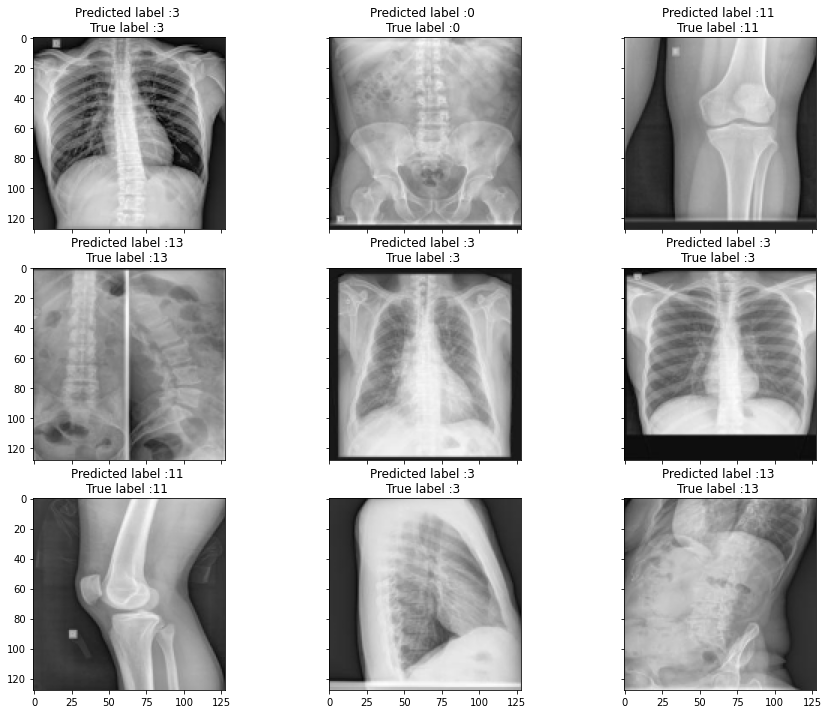

In [14]:
# Show some random accurately predicted samples
label=['0 ','1 ','2 ','3 ','4 ','5 ','6 ','7 ','8 ','9 ','10 ','11 ','12 ','13 ','14 ','15 ','16 ','17 ','18 ','19 ','20 ','21 '] #the kaggle submission needs str in the csv
imidx = random.sample(accurateindex, k=9)   #random.sample(sequence, k), k: An Integer value, it specify the length of a sample.

nrows = 3
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(15, 12))

n = 0
for row in range(nrows):
    for col in range(ncols):
            ax[row,col].imshow(xtest[imidx[n]])
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(label[np.argmax(ypred[imidx[n]])], label[np.argmax(ytest[imidx[n]])]))
            n += 1

plt.show()

6/6 [==============================] - 4s 609ms/step


Text(0.5, 145.31999999999996, 'Predicted')

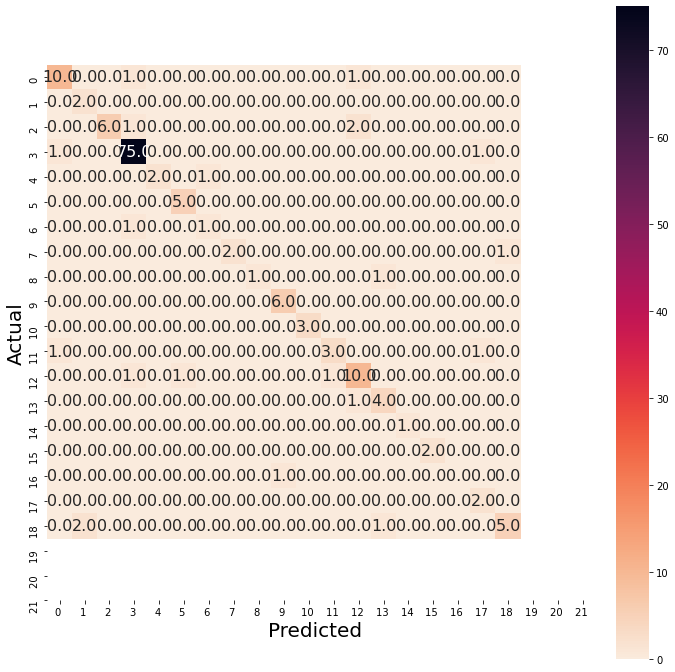

In [15]:
Ypred = model.predict(xtest)

Ypred = np.argmax(Ypred, axis=1)
Ytrue = np.argmax(ytest, axis=1)

cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [16]:
loaded_model = tensorflow.keras.models.load_model('DenseNet121_071122_model.h5')

In [17]:
test_pd = pd.read_csv("C:/UNIFESP_Xray/Xray_small/sample_submission.csv")

test_path = "C:/UNIFESP_Xray/Xray_small_jpg/test/"

submission_data = []
submission_labels = []
print(type(submission_data))

for test_id in test_pd['SOPInstanceUID']:
    test_img = cv2.imread(test_path+test_id+"-c.jpg")
    test_img = cv2.resize(test_img, (128,128))
    test_img = img_to_array(test_img)
    submission_data.append(test_img)

submission_data = np.array(submission_data, dtype="float32") / 255.0   #normaliztion
    
submission_preds = loaded_model.predict(submission_data)
print("raw predicted arrays:",submission_preds)

submission_labels = [label[index]+" " for index in np.argmax(submission_preds, axis=1)]

print("maximum probability:",submission_labels)

test_pd['Target'] = submission_labels
test_pd.to_csv("C:/Users/janic/Desktop/DSFederal/submission_DenseNet121_0711.csv", index=False)

<class 'list'>
1.2.826.0.1.3680043.8.498.10001001190452685542754353271306894106
1.2.826.0.1.3680043.8.498.10022667601042710442884728915610557590
1.2.826.0.1.3680043.8.498.10024395388921105474336784272390605225
1.2.826.0.1.3680043.8.498.10026689165626095651568657562992631805
1.2.826.0.1.3680043.8.498.10035936364561920980924160549027696414
1.2.826.0.1.3680043.8.498.10048151016194111821946577128316853508
1.2.826.0.1.3680043.8.498.10050288866897098549171724525519515056
1.2.826.0.1.3680043.8.498.10058159876923426607443905471214229386
1.2.826.0.1.3680043.8.498.10080393723513249121106839017290899983
1.2.826.0.1.3680043.8.498.10111879479980116660072960146970217082
1.2.826.0.1.3680043.8.498.10116555884976815618529666854373293753
1.2.826.0.1.3680043.8.498.10125588225082997661929762672815548661
1.2.826.0.1.3680043.8.498.10148122730808677059620287428321716583
1.2.826.0.1.3680043.8.498.10153076871458372382720547554875076366
1.2.826.0.1.3680043.8.498.10200692886734407833786683970575528183
1.2.826.0.

1.2.826.0.1.3680043.8.498.14783372323699824508063140333902230343
1.2.826.0.1.3680043.8.498.14796810619634424654281390809900921251
1.2.826.0.1.3680043.8.498.14956086647340280416413669360319800748
1.2.826.0.1.3680043.8.498.15046523979871105186054213591520708699
1.2.826.0.1.3680043.8.498.15161424654849985485982947339808150945
1.2.826.0.1.3680043.8.498.15258793445960301105184120769767548330
1.2.826.0.1.3680043.8.498.15419821237829049532870458303356459132
1.2.826.0.1.3680043.8.498.15443806630978920989246284312550027656
1.2.826.0.1.3680043.8.498.15763725813047708756688285750878654922
1.2.826.0.1.3680043.8.498.15899111416408689050931926573231415064
1.2.826.0.1.3680043.8.498.15920241615069879517384843677592864871
1.2.826.0.1.3680043.8.498.16216058231306439024979305044663424816
1.2.826.0.1.3680043.8.498.16348640619558676737705721325352041362
1.2.826.0.1.3680043.8.498.16361682046216170738858439408030654166
1.2.826.0.1.3680043.8.498.16561850714546045510337340551973115082
1.2.826.0.1.3680043.8.498

1.2.826.0.1.3680043.8.498.49709831451501281572605316079827979774
1.2.826.0.1.3680043.8.498.49744831944813830418222026670616330965
1.2.826.0.1.3680043.8.498.50058489023024018785936333255172564316
1.2.826.0.1.3680043.8.498.50152264776731184877164426350855541932
1.2.826.0.1.3680043.8.498.50590200925141334554205364799168186506
1.2.826.0.1.3680043.8.498.50797364402056824587474339603886408731
1.2.826.0.1.3680043.8.498.51099316646081289110768364145915459866
1.2.826.0.1.3680043.8.498.51480839884994365574872169338881612192
1.2.826.0.1.3680043.8.498.51699884752597338470829208291855019777
1.2.826.0.1.3680043.8.498.51720017190109284119435273046429738760
1.2.826.0.1.3680043.8.498.51758430638514020338580551231465312159
1.2.826.0.1.3680043.8.498.51772035099900337132564270598281946938
1.2.826.0.1.3680043.8.498.51783552148696762018128633402773069315
1.2.826.0.1.3680043.8.498.51863625352236122969950503402818479087
1.2.826.0.1.3680043.8.498.51915705396985739288734231376407889081
1.2.826.0.1.3680043.8.498

1.2.826.0.1.3680043.8.498.71110032779393208873965832814483810143
1.2.826.0.1.3680043.8.498.71170167780958966750029026282582456586
1.2.826.0.1.3680043.8.498.71186229374814937038832243411540919627
1.2.826.0.1.3680043.8.498.71253884171978232131318123553353694345
1.2.826.0.1.3680043.8.498.71633649879511576564010068500235507909
1.2.826.0.1.3680043.8.498.72142851095926628606098728211264827092
1.2.826.0.1.3680043.8.498.72273725103548785176854276228563022456
1.2.826.0.1.3680043.8.498.72326490910546010781096122563743121315
1.2.826.0.1.3680043.8.498.72458842992313379362300051968991857091
1.2.826.0.1.3680043.8.498.72533800876543798738969965510832915095
1.2.826.0.1.3680043.8.498.72704739558710901118275999806619942436
1.2.826.0.1.3680043.8.498.72746626832123252484222818645606060948
1.2.826.0.1.3680043.8.498.72818995443238869657781877577239636528
1.2.826.0.1.3680043.8.498.73216389359011674636596071377512250442
1.2.826.0.1.3680043.8.498.73342147686402673190172894945762379951
1.2.826.0.1.3680043.8.498

24/24 [==============================] - 19s 725ms/step
raw preds: [[7.4137354e-08 1.6529958e-07 4.5799709e-08 ... 1.0688641e-06
  2.1625588e-06 3.6032894e-01]
 [7.7825825e-04 3.0032768e-05 1.9261709e-03 ... 9.6161333e-05
  9.0563332e-04 9.2392329e-06]
 [1.1178207e-06 1.3006120e-03 7.1995804e-05 ... 6.4732085e-05
  4.0709882e-04 1.4653642e-03]
 ...
 [9.6583708e-06 5.1164551e-07 9.6779161e-08 ... 1.8811771e-06
  7.2481694e-06 5.2144255e-08]
 [7.4764058e-12 2.3632687e-08 9.3501755e-11 ... 1.4392925e-09
  6.3511765e-11 9.9999952e-01]
 [2.7058762e-03 6.2639148e-05 2.6749140e-05 ... 7.5501454e-04
  6.0831335e-05 1.3185631e-05]]
argmax: ['9  ', '3  ', '9  ', '3  ', '3  ', '14  ', '3  ', '1  ', '3  ', '5  ', '0  ', '3  ', '3  ', '3  ', '11  ', '21  ', '3  ', '3  ', '21  ', '14  ', '3  ', '3  ', '3  ', '3  ', '3  ', '21  ', '11  ', '3  ', '11  ', '0  ', '3  ', '1  ', '3  ', '3  ', '3  ', '16  ', '14  ', '11  ', '3  ', '3  ', '9  ', '5  ', '2  ', '0  ', '3  ', '17  ', '14  ', '6  ', '21  ', '9 